# 전국 아파트 매매가 분석 및 예측 프로젝트 

# 1. 개요

본 데이터는 한국감정원 아파트 거래현황 자료의 2017.10.01 ~ 2019.12.31 데이터입니다. 
전반적인 데이터를 전처리 및 시각화 한 후
Random Forest 모델을 적용해 지역별(구 기준), ?별 제곱미터당 거래가격을 예측해보는 회귀모델을 생성 해보았습니다. 

검색조건 계약일자 : 20170101 ~ 20191231 
실거래구분 : 아파트(매매) 
주소구분 : 지번주소 
시도 : 전체
시군구 : 전체 
읍면동 : 전체 
면적 : 전체 
금액선택 : 전체

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import matplotlib.font_manager as fm
from sklearn.ensemble import RandomForestRegressor
import sklearn as sk
import sklearn.datasets as skd
import sklearn.ensemble as ske
from sklearn.model_selection import train_test_split
%matplotlib inline

In [3]:
# 데이터 불러오기
apt2017_1 = pd.read_csv('C:/Users/이현주/Desktop/대학교/ESAA/2020-1 부동산 가격예측 프로젝트/TeamProject/2017-1_apt.csv', thousands = ',') # thousands = ',' : 천 단위 자리 구분 기호 없애고 가져오기
apt2017_2 = pd.read_csv('C:/Users/이현주/Desktop/대학교/ESAA/2020-1 부동산 가격예측 프로젝트/TeamProject/2017-2_apt.csv', thousands = ',')
apt2017_3 = pd.read_csv('C:/Users/이현주/Desktop/대학교/ESAA/2020-1 부동산 가격예측 프로젝트/TeamProject/2017-3_apt.csv', thousands = ',')
apt2017_4 = pd.read_csv('C:/Users/이현주/Desktop/대학교/ESAA/2020-1 부동산 가격예측 프로젝트/TeamProject/2017-4_apt.csv', thousands = ',')
apt2017_5 = pd.read_csv('C:/Users/이현주/Desktop/대학교/ESAA/2020-1 부동산 가격예측 프로젝트/TeamProject/2017-5_apt.csv', thousands = ',')
apt2017_6 = pd.read_csv('C:/Users/이현주/Desktop/대학교/ESAA/2020-1 부동산 가격예측 프로젝트/TeamProject/2017-6_apt.csv', thousands = ',')
apt2017_7 = pd.read_csv('C:/Users/이현주/Desktop/대학교/ESAA/2020-1 부동산 가격예측 프로젝트/TeamProject/2017-7_apt.csv', thousands = ',')
apt2017_8 = pd.read_csv('C:/Users/이현주/Desktop/대학교/ESAA/2020-1 부동산 가격예측 프로젝트/TeamProject/2017-8_apt.csv', thousands = ',')
apt2017_9 = pd.read_csv('C:/Users/이현주/Desktop/대학교/ESAA/2020-1 부동산 가격예측 프로젝트/TeamProject/2017-9_apt.csv', thousands = ',')
apt2017_10 = pd.read_csv('C:/Users/이현주/Desktop/대학교/ESAA/2020-1 부동산 가격예측 프로젝트/TeamProject/2017-10_apt.csv', thousands = ',')
apt2017_11 = pd.read_csv('C:/Users/이현주/Desktop/대학교/ESAA/2020-1 부동산 가격예측 프로젝트/TeamProject/2017-11_apt.csv', thousands = ',')
apt2017_12 = pd.read_csv('C:/Users/이현주/Desktop/대학교/ESAA/2020-1 부동산 가격예측 프로젝트/TeamProject/2017-12_apt.csv', thousands = ',')

apt2018_1 = pd.read_csv('C:/Users/이현주/Desktop/대학교/ESAA/2020-1 부동산 가격예측 프로젝트/TeamProject/2018-1_apt.csv', thousands = ',')
apt2018_2 = pd.read_csv('C:/Users/이현주/Desktop/대학교/ESAA/2020-1 부동산 가격예측 프로젝트/TeamProject/2018-2_apt.csv', thousands = ',')
apt2018_3 = pd.read_csv('C:/Users/이현주/Desktop/대학교/ESAA/2020-1 부동산 가격예측 프로젝트/TeamProject/2018-3_apt.csv', thousands = ',')
apt2018_4 = pd.read_csv('C:/Users/이현주/Desktop/대학교/ESAA/2020-1 부동산 가격예측 프로젝트/TeamProject/2018-4_apt.csv', thousands = ',')
apt2018_5 = pd.read_csv('C:/Users/이현주/Desktop/대학교/ESAA/2020-1 부동산 가격예측 프로젝트/TeamProject/2018-5_apt.csv', thousands = ',')
apt2018_6 = pd.read_csv('C:/Users/이현주/Desktop/대학교/ESAA/2020-1 부동산 가격예측 프로젝트/TeamProject/2018-6_apt.csv', thousands = ',')
apt2018_7 = pd.read_csv('C:/Users/이현주/Desktop/대학교/ESAA/2020-1 부동산 가격예측 프로젝트/TeamProject/2018-7_apt.csv', thousands = ',')
apt2018_8 = pd.read_csv('C:/Users/이현주/Desktop/대학교/ESAA/2020-1 부동산 가격예측 프로젝트/TeamProject/2018-8_apt.csv', thousands = ',')
apt2018_9 = pd.read_csv('C:/Users/이현주/Desktop/대학교/ESAA/2020-1 부동산 가격예측 프로젝트/TeamProject/2018-9_apt.csv', thousands = ',')
apt2018_10 = pd.read_csv('C:/Users/이현주/Desktop/대학교/ESAA/2020-1 부동산 가격예측 프로젝트/TeamProject/2018-10_apt.csv', thousands = ',')
apt2018_11 = pd.read_csv('C:/Users/이현주/Desktop/대학교/ESAA/2020-1 부동산 가격예측 프로젝트/TeamProject/2018-11_apt.csv', thousands = ',')
apt2018_12 = pd.read_csv('C:/Users/이현주/Desktop/대학교/ESAA/2020-1 부동산 가격예측 프로젝트/TeamProject/2018-12_apt.csv', thousands = ',')

apt2019_1 = pd.read_csv('C:/Users/이현주/Desktop/대학교/ESAA/2020-1 부동산 가격예측 프로젝트/TeamProject/2019-1_apt.csv', thousands = ',')
apt2019_2 = pd.read_csv('C:/Users/이현주/Desktop/대학교/ESAA/2020-1 부동산 가격예측 프로젝트/TeamProject/2019-2_apt.csv', thousands = ',')
apt2019_3 = pd.read_csv('C:/Users/이현주/Desktop/대학교/ESAA/2020-1 부동산 가격예측 프로젝트/TeamProject/2019-3_apt.csv', thousands = ',')
apt2019_4 = pd.read_csv('C:/Users/이현주/Desktop/대학교/ESAA/2020-1 부동산 가격예측 프로젝트/TeamProject/2019-4_apt.csv', thousands = ',')
apt2019_5 = pd.read_csv('C:/Users/이현주/Desktop/대학교/ESAA/2020-1 부동산 가격예측 프로젝트/TeamProject/2019-5_apt.csv', thousands = ',')
apt2019_6 = pd.read_csv('C:/Users/이현주/Desktop/대학교/ESAA/2020-1 부동산 가격예측 프로젝트/TeamProject/2019-6_apt.csv', thousands = ',')
apt2019_7 = pd.read_csv('C:/Users/이현주/Desktop/대학교/ESAA/2020-1 부동산 가격예측 프로젝트/TeamProject/2019-7_apt.csv', thousands = ',')
apt2019_8 = pd.read_csv('C:/Users/이현주/Desktop/대학교/ESAA/2020-1 부동산 가격예측 프로젝트/TeamProject/2019-8_apt.csv', thousands = ',')
apt2019_9 = pd.read_csv('C:/Users/이현주/Desktop/대학교/ESAA/2020-1 부동산 가격예측 프로젝트/TeamProject/2019-9_apt.csv', thousands = ',')
apt2019_10 = pd.read_csv('C:/Users/이현주/Desktop/대학교/ESAA/2020-1 부동산 가격예측 프로젝트/TeamProject/2019-10_apt.csv', thousands = ',')
apt2019_11 = pd.read_csv('C:/Users/이현주/Desktop/대학교/ESAA/2020-1 부동산 가격예측 프로젝트/TeamProject/2019-11_apt.csv', thousands = ',')
apt2019_12 = pd.read_csv('C:/Users/이현주/Desktop/대학교/ESAA/2020-1 부동산 가격예측 프로젝트/TeamProject/2019-12_apt.csv', thousands = ',')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# 연도별로 데이터 합치기
apt2017 = pd.concat([apt2017_1, apt2017_2, apt2017_3, apt2017_4, apt2017_5, apt2017_6, apt2017_7, apt2017_8, apt2017_9, apt2017_10, apt2017_11, apt2017_12])
apt2018 = pd.concat([apt2018_1, apt2018_2, apt2018_3, apt2018_4, apt2018_5, apt2018_6, apt2018_7, apt2018_8, apt2018_9, apt2018_10, apt2018_11, apt2018_12])
apt2019 = pd.concat([apt2019_1, apt2019_2, apt2019_3, apt2019_4, apt2019_5, apt2019_6, apt2019_7, apt2019_8, apt2019_9, apt2019_10, apt2019_11, apt2019_12])
apt171819 = pd.concat([apt2017, apt2018, apt2019]) 

In [106]:
apt171819.describe()

,부번,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,전용면적당가격
count,1.610485e+06,1.610485e+06,1.610485e+06,1.610485e+06,1.610485e+06,1.610485e+06,1.610485e+06,1.610485e+06
mean,4.648252e+00,7.615636e+01,2.018045e+05,1.584940e+01,3.281571e+04,9.177554e+00,2.001262e+03,4.199926e+02
std,3.727847e+01,2.665928e+01,8.331016e+01,8.763556e+00,3.003593e+04,6.288807e+00,9.383382e+00,3.125531e+02
min,0.000000e+00,9.260000e+00,2.017010e+05,1.000000e+00,5.000000e+02,-3.000000e+00,1.961000e+03,1.000500e+01
25%,0.000000e+00,5.974800e+01,2.017090e+05,8.000000e+00,1.550000e+04,4.000000e+00,1.994000e+03,2.323426e+02
50%,0.000000e+00,7.980000e+01,2.018060e+05,1.600000e+01,2.520000e+04,8.000000e+00,2.001000e+03,3.362152e+02
75%,1.000000e+00,8.496140e+01,2.019050e+05,2.300000e+01,4.000000e+04,1.300000e+01,2.009000e+03,5.014990e+02
max,2.837000e+03,3.950600e+02,2.019120e+05,3.100000e+01,8.400000e+05,7.700000e+01,2.020000e+03,6.969612e+03


# 2. 탐색적 자료분석 (EDA)

구별 1평거래금액의 평균
층별 거래량
건축년도별 평당가격평균
거래량(월별, 구별)
전용면적별 거래량(어떤 면적의 거래량이 많은지)
2000년 전/후 건축된 아파트들의 거래금액 비교

# 전처리

1. 시군구 변수를 시-군-구로 분리

In [5]:
apt171819['도'] = apt171819['시군구'].str.split(' ').str[0]
apt171819['시/구'] = apt171819['시군구'].str.split(' ').str[1]
apt171819['동'] = apt171819['시군구'].str.split(' ').str[2]
apt171819['동']

0        견소동
1        견소동
2        견소동
3        견소동
4         교동
        ... 
70396    호암동
70397    호암동
70398    호암동
70399    호암동
70400    호암동
Name: 동, Length: 1610485, dtype: object

2. 계약년월을 계약연도-계약월로 분리

In [6]:
apt171819['계약년월1'] = apt171819['계약년월'].astype(str)
apt171819['계약연도'] = apt171819['계약년월1'].str[0:4]
apt171819['계약월'] = apt171819['계약년월1'].str[4:]
apt171819['계약월']

0        01
1        01
2        01
3        01
4        01
         ..
70396    12
70397    12
70398    12
70399    12
70400    12
Name: 계약월, Length: 1610485, dtype: object

# 데이터 살펴보기

1. 구별 제곱미터당 거래가격의 평균

In [111]:
mean_price_per_square = apt171819.groupby('시/구').mean()
mean_price_per_square['전용면적당 평균거래가'] = mean_price_per_square['거래금액(만원)']
mean_price_per_square = mean_price_per_square.loc[:,['전용면적당 평균거래가']]
mean_price_per_square = mean_price_per_square.sort_values('전용면적당 평균거래가', ascending=False)

# top 10
mean_price_per_square_top10 = mean_price_per_square.iloc[:10]
mean_price_per_square_top10

,전용면적당 평균거래가
시/구,
강남구,149015.261770
서초구,140132.769003
용산구,127033.021816
송파구,99544.650690
과천시,97342.745044
성동구,80254.320578
광진구,78193.929780
마포구,77013.779386
성남분당구,74552.339188


2. 층별 거래량

In [38]:
#volume_by_floor = apt171819.groupby(['층'])['거래금액(만원)'].count().sort_values(ascending=False)
#volume_by_floor
# 층을 그룹화 하여 count 적용
volume_by_floor = apt171819.groupby('층').count()

# 현재 층마다 모든 열에 대해 거래량이 기입되었기 때문에 임의의 열을 가져와 '층별거래량'라는 이름의 열로 재생성
volume_by_floor['층별거래량'] = volume_by_floor['시군구']

# 생성한 count 열만 채널이름과 함께 가져오기
volume_by_floor = volume_by_floor.loc[:,['층별거래량']]

# 내림차순 정렬 (인기영상에 진입한 횟수 많은 순으로)
volume_by_floor = volume_by_floor.sort_values('층별거래량', ascending=False)

# top 10
volume_by_floor_top10 = volume_by_floor.iloc[:10]
volume_by_floor_top10

,층별거래량
층,
5,117730
4,116449
3,114232
2,108988
1,97946
6,96017
7,91673
8,90466
9,88826


3. 건축년도별 거래가격 평균

In [39]:
mean_price_per_cnstr_year = apt171819.groupby('건축년도').mean()
mean_price_per_cnstr_year['건축년도별 거래가격 평균'] = mean_price_per_cnstr_year['거래금액(만원)']
mean_price_per_cnstr_year = mean_price_per_cnstr_year.loc[:,['건축년도별 거래가격 평균']]
mean_price_per_cnstr_year = mean_price_per_cnstr_year.sort_values('건축년도별 거래가격 평균', ascending=False)

# top 10
mean_price_per_cnstr_year_top10 = mean_price_per_cnstr_year.iloc[:10]
mean_price_per_cnstr_year_top10

,건축년도별 거래가격 평균
건축년도,
1973,219004.012048
1978,77464.982501
1976,76372.339638
1971,74474.652997
1974,69250.007092
1977,65545.783113
1979,59048.420227
1975,58195.606982
1982,51282.298896


4. 월별 거래량

In [132]:
volume_by_month = apt171819.groupby('계약월').count()
volume_by_month['당월 계약수'] = volume_by_month['거래금액(만원)']
volume_by_month = volume_by_month.loc[:,['당월 계약수']]
volume_by_month = volume_by_month.sort_values('당월 계약수', ascending=False)
volume_by_month

,당월 계약수
계약월,
11,148971
10,148299
08,143473
07,143435
09,142119
03,139852
06,139782
12,137454
05,130748


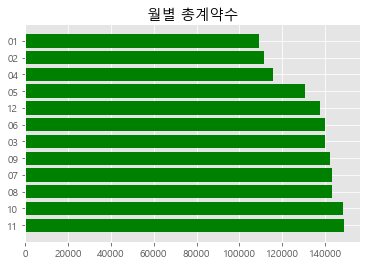

In [139]:
plt.rc('font', family='Malgun Gothic')
plt.title("월별 총계약수")
plt.barh(volume_by_month.index, volume_by_month['당월 계약수'], color='green')
plt.show()

5. 구별 거래량

In [11]:
volume_by_sigu = apt171819.groupby(['시/구'])['거래금액(만원)'].count().sort_values(ascending=False)
volume_by_sigu #전국 각도에 동서남북구 있어서 정확하게 알수없음

시/구
서구     63027
북구     55463
동구     31474
남구     31414
부천시    27047
       ...  
영양군       36
소정면       23
전동면       15
울릉군        9
신안군        1
Name: 거래금액(만원), Length: 248, dtype: int64

6. 전용면적별 거래량 (어떤 평수가 거래량이 많은지)

In [137]:
apt171819['전용면적 올림'] = round(apt171819['전용면적(㎡)'])
volume_by_total_surface = apt171819.groupby('전용면적 반올림').count()
volume_by_total_surface['전용면적별 거래량'] = volume_by_total_surface['거래금액(만원)']
volume_by_total_surface = volume_by_total_surface.loc[:,['전용면적별 거래량']]
volume_by_total_surface = volume_by_total_surface.sort_values('전용면적별 거래량', ascending=False)
volume_by_total_surface  # 85㎡ - 약 25~6평/ 60㎡ - 약 18평 정도 거래량이 월등히 많음

,전용면적별 거래량
전용면적 반올림,
85.0,483387
60.0,297215
50.0,53641
59.0,53315
84.0,50629
...,...
253.0,1
258.0,1
266.0,1


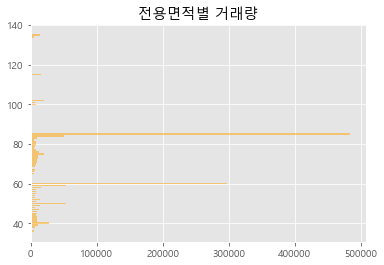

In [143]:
volume_by_total_surface_top50 = volume_by_total_surface.iloc[:50]
volume_by_total_surface_top50
plt.rc('font', family='Malgun Gothic')
plt.title("전용면적별 거래량")
plt.barh(volume_by_total_surface_top50.index, volume_by_total_surface_top50['전용면적별 거래량'], color='orange', alpha = 0.5)
plt.show() # 주로 40㎡(12평) ~ 90㎡ (27평) 사이의 아파트가 많이 거래됨

# 2000년 전/후 건축된 아파트들의 거래금액 비교 
(전용면적, 최대층 과도 비교해보기)

In [148]:
apt171819['건축연도']=0
apt171819.loc[(apt171819['건축년도'] < 2000), '건축연도'] = '2000년 이전 건축'
apt171819.loc[(apt171819['건축년도'] >= 2000), '건축연도'] = '2000년 이후 건축'

meanprice_2000_contrast = apt171819.groupby('건축연도').mean()
meanprice_2000_contrast['평균 가격'] = meanprice_2000_contrast['거래금액(만원)']
meanprice_2000_contrast = meanprice_2000_contrast.loc[:,['평균 가격']]
meanprice_2000_contrast

,평균 가격
건축연도,
2000년 이전 건축,26935.610612
2000년 이후 건축,37584.821324


<function matplotlib.pyplot.show(*args, **kw)>

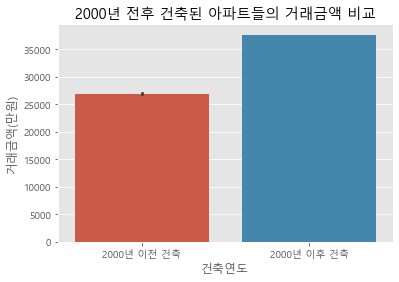

In [149]:
# 2000년 전후 건축된 아파트들의 거래금액 비교
sns.barplot(x="건축연도", y="거래금액(만원)", data=apt171819)
plt.title("2000년 전후 건축된 아파트들의 거래금액 비교")
plt.xlabel('건축연도')
plt.ylabel('거래금액(만원)')
plt.show

# 랜덤 포레스트

In [150]:
selection = np.random.binomial(1,0.7,size=len(apt171819)).astype(bool)
training = apt171819[selection]
testing = apt171819[~selection]

In [89]:
rfr = RandomForestRegressor()
predictors_tra = training.loc[:, "전용면적(㎡)" :"건축년도"]
predictors_tst = testing.loc[:, "전용면적(㎡)":"건축년도"]
feature = "거래금액(만원)"
rfr.fit(predictors_tra, training[feature])
plt.style.use("ggplot")
plt.scatter(training[feature], rfr.predict(predictors_tra), c = "green", s = 50)
plt.scatter(testing[feature], rfr.predict(predictors_tst), c = "red")
plt.legend(["Training data", "Testing data"], loc = "upper left")
plt.plot(training[feature], training[feature], c = "blue")
plt.xlabel("Actual value")
plt.ylabel("Predicted value")

NameError: name 'matplotlib' is not defined

KeyError: 'feature_names'

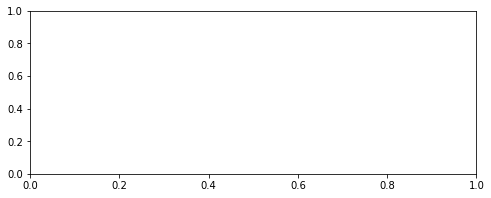

In [87]:
reg = ske.RandomForestRegressor()
X = training['전용면적당가격']
y = testing['전용면적당가격']
reg.fit([X], [y])
fet_ind = np.argsort(reg.feature_importances_)[::-1]
fet_imp = reg.feature_importances_[fet_ind]b
fig, ax = plt.subplots(1, 1, figsize=(8, 3))
labels = apt171819['feature_names'][fet_ind]
pd.Series(fet_imp, index=labels).plot('bar', ax=ax)
ax.set_title('Features importance')

In [ ]:
# 훈련/테스트 세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100,random_state=0)
forest.fit(X_train,y_train)

print("훈련 세트 정확도 : {:.3f}".format(forest.score(X_train,y_train)))
print("테스트 세트 정확도 : {:.3f}".format(forest.score(X_test,y_test)))

# 특성 중요도
print("특성 중요도 : \n{}".format(forest.feature_importances_))

# 특성 중요도 시각화 하기
def plot_feature_importances_cancer(model):

    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("attr importances")
    plt.ylabel("attr")
    plt.ylim(-1, n_features)
    
plt.show()

plot_feature_importances_cancer(forest)

In [97]:
from sklearn.model_selection import train_test_split
x = apt171819[['계약년월', '층', '건축년도']]
y = apt171819['전용면적당가격']

# 테스트 데이터 30%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

1127339
483146
1127339
483146


In [101]:
# 데이터 학습 & 예측 정확도 확인
# 70%의 학습데이터를 랜덤포레스트를 이용해서 학습 시킨 후, 30%의 예측데이터를 예측 분류하여 실제 데이터와 비교하여 정확도를 확인한다.
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics  
# 학습 진행
forest = RandomForestClassifier(n_estimators=100)
forest.fit(x_train, y_train)
 
# 예측
y_pred = forest.predict(x_test)
print(y_pred)
print(list(y_test))
 
# 정확도 확인
#print('정확도 :', metrics.accuracy_score(y_test, y_pred))

ValueError: Unknown label type: 'continuous'

In [104]:
from sklearn import datasets
if __name__ == '__main__':
    iris = datasets.load_iris()
    print('아이리스 종류 :', iris.target_names)
    print('target : [0:setosa, 1:versicolor, 2:virginica]')
    print('데이터 수 :', len(iris.data))
    print('데이터 열 이름 :', iris.feature_names)
 
    # iris data Dataframe으로
    data = pd.DataFrame(
        {
            'sepal length': iris.data[:, 0],
            'sepal width': iris.data[:, 1],
            'petal length': iris.data[:, 2],
            'petal width': iris.data[:, 3],
            'species': iris.target
        }
    )
    print(data.head())

아이리스 종류 : ['setosa' 'versicolor' 'virginica']
target : [0:setosa, 1:versicolor, 2:virginica]
데이터 수 : 150
데이터 열 이름 : ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
   sepal length  sepal width  petal length  petal width  species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0
